<a href="https://colab.research.google.com/github/Romario1975/calc_and_win/blob/master/social_contracts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель исследования заключается в предположении, что выданные объемы Социальных контрактов по субъектам РФ не меняются и остаются на прежнем уровне с 2021 - 2023 годы. Необходимо доказать или опрвергнуть данное предположение

Изначально даны данные по выданным Соц контрактам по Субъекта Федерации РФ за три года. Контракты выдаются малоимущим под конкретные цели на основании поданного заявления. Наша работа состоит в том чтобы изучить изменения в запросах, а именно понять идет ли улучшение ситуации в целом по РФ.    **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/гипотеза.xlsx')


In [ ]:
df.head()

,RF_regions,social_contracts_2021,social_contracts_2022,social_contracts_2023_aug,social_contracts_2023_sept
0,Республика Адыгея (Адыгея),714.0,735.0,598.0,669.0
1,Республика Алтай,2601.0,2468.0,1401.0,1514.0
2,Республика Башкортостан,5102.0,5160.0,2878.0,3325.0
3,Республика Бурятия,2114.0,2446.0,1417.0,1567.0
4,Республика Дагестан,7653.0,6900.0,4824.0,5473.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Субъект РФ                     84 non-null     object 
 1   Соц контракты  21 год          85 non-null     float64
 2   Соц контракты 22 год           85 non-null     float64
 3   Соц контракты  23 год август   85 non-null     float64
 4   Соц контракты 23 год сентябрь  85 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


In [ ]:
df.isnull().sum()

Субъект РФ                       2
Соц контракты  21 год            1
Соц контракты 22 год             1
Соц контракты  23 год август     1
Соц контракты 23 год сентябрь    1
dtype: int64

In [ ]:
df = df.dropna()
df.head()

,Субъект РФ,Соц контракты 21 год,Соц контракты 22 год,Соц контракты 23 год август,Соц контракты 23 год сентябрь
0,Республика Адыгея (Адыгея),714.0,735.0,598.0,669.0
1,Республика Алтай,2601.0,2468.0,1401.0,1514.0
2,Республика Башкортостан,5102.0,5160.0,2878.0,3325.0
3,Республика Бурятия,2114.0,2446.0,1417.0,1567.0
4,Республика Дагестан,7653.0,6900.0,4824.0,5473.0


In [ ]:
df.isnull().sum()

RF_regions                    0
social_contracts_2021         0
social_contracts_2022         0
social_contracts_2023_aug     0
social_contracts_2023_sept    0
dtype: int64

In [ ]:
print(f'полных дубликатов: {df.duplicated().sum()}')

полных дубликатов: 0


In [ ]:
df.columns

Index(['Субъект РФ', 'Соц контракты  21 год', 'Соц контракты 22 год',
       'Соц контракты  23 год август', 'Соц контракты 23 год сентябрь'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'Субъект РФ': 'RF_regions', 'Соц контракты  21 год':'social_contracts_2021',  'Соц контракты  23 год август':'social_contracts_2023_aug',
                         'Соц контракты 22 год':'social_contracts_2022', 'Соц контракты 23 год сентябрь': 'social_contracts_2023_sept' })


In [ ]:
df.head()

,RF_regions,social_contracts_2021,social_contracts_2022,social_contracts_2023_aug,social_contracts_2023_sept
0,Республика Адыгея (Адыгея),714.0,735.0,598.0,669.0
1,Республика Алтай,2601.0,2468.0,1401.0,1514.0
2,Республика Башкортостан,5102.0,5160.0,2878.0,3325.0
3,Республика Бурятия,2114.0,2446.0,1417.0,1567.0
4,Республика Дагестан,7653.0,6900.0,4824.0,5473.0


In [ ]:
#всего выданных СК в 2021 году
df['social_contracts_2021'].sum()

282378.0

In [ ]:
#всего выданных СК в 2022 году
df['social_contracts_2022'].sum()

276307.0

In [ ]:
#всего выданных СК в 2023 году до августа
df['social_contracts_2023_aug'].sum()

146597.0

In [ ]:
#всего выданных СК в 2023 году до сентября
df['social_contracts_2023_sept'].sum()


168384.0

In [ ]:
df.columns

Index(['RF_regions', 'social_contracts_2021', 'social_contracts_2022',
       'social_contracts_2023_aug', 'social_contracts_2023_sept'],
      dtype='object')

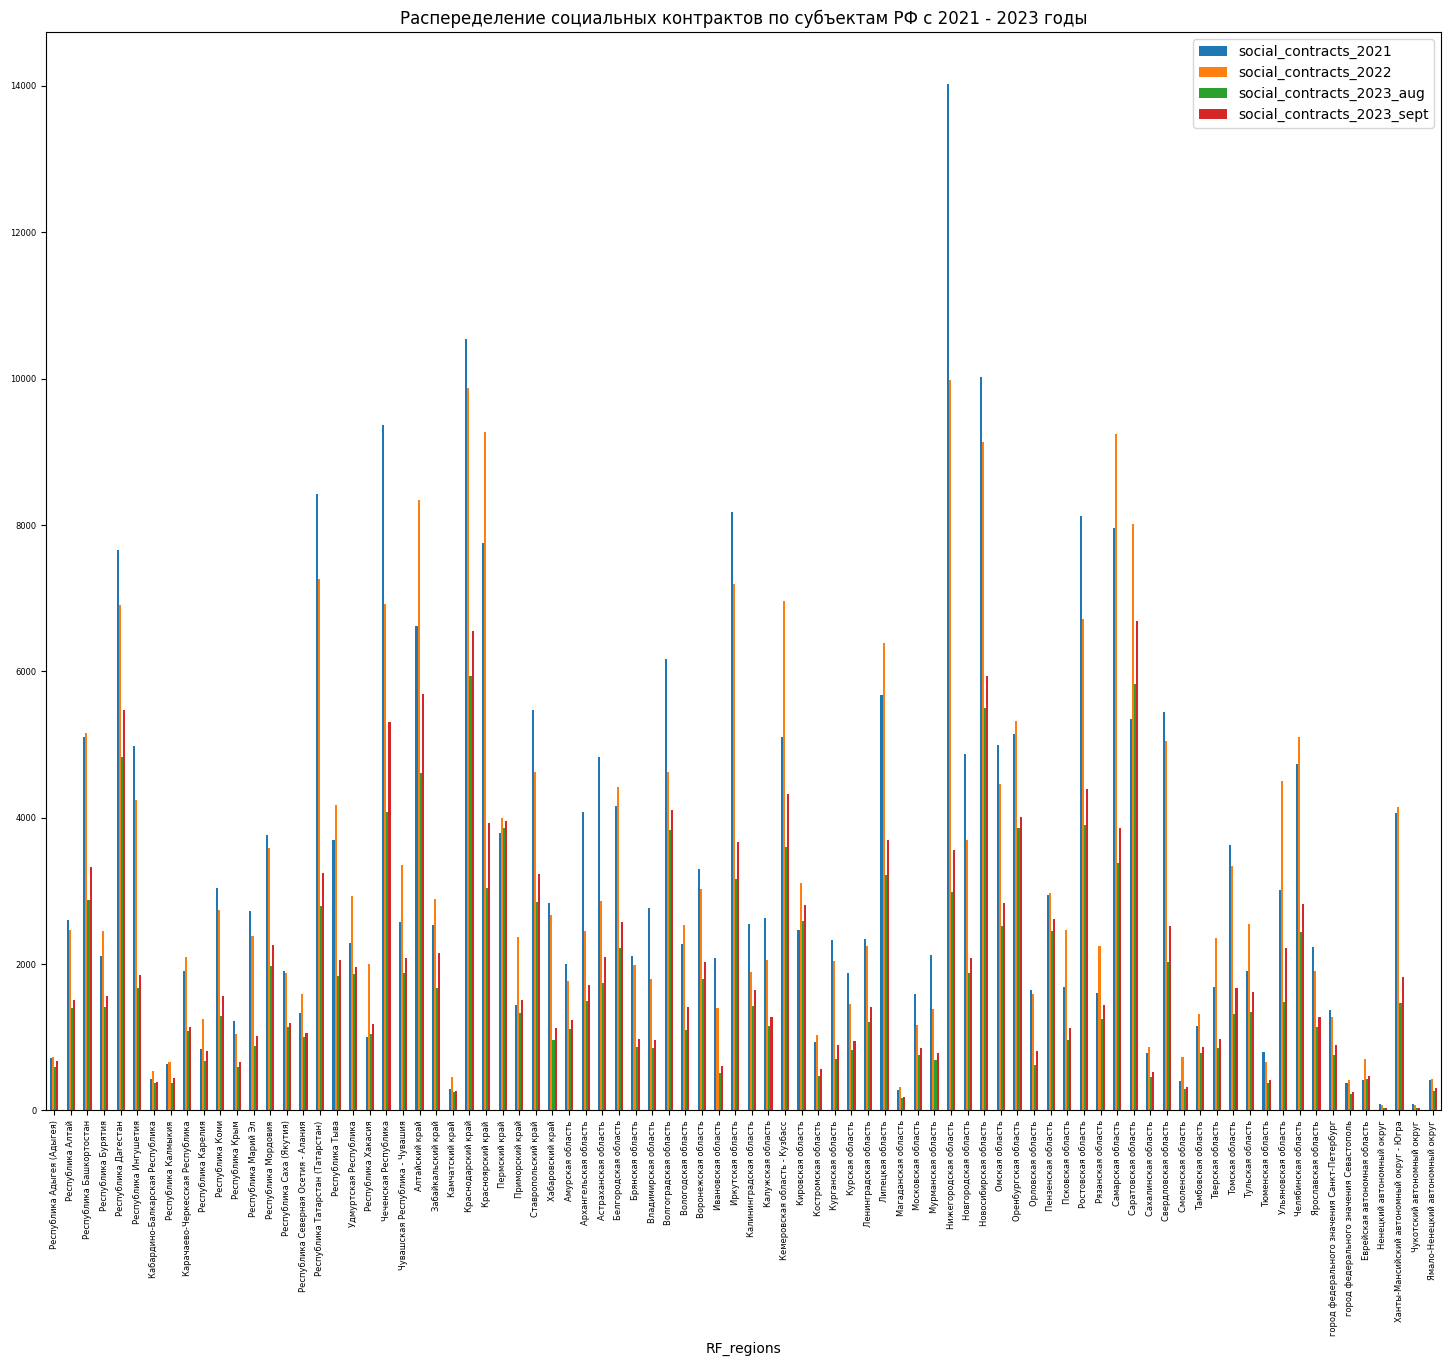

In [ ]:
df.plot(title = 'Распеределение социальных контрактов по субъектам РФ с 2021 - 2023 годы', x = 'RF_regions', y = ['social_contracts_2021', 'social_contracts_2022','social_contracts_2023_aug', 'social_contracts_2023_sept'], kind = 'bar', figsize=(18,14), fontsize = 6 )
plt.show()

<Axes: ylabel='Frequency'>

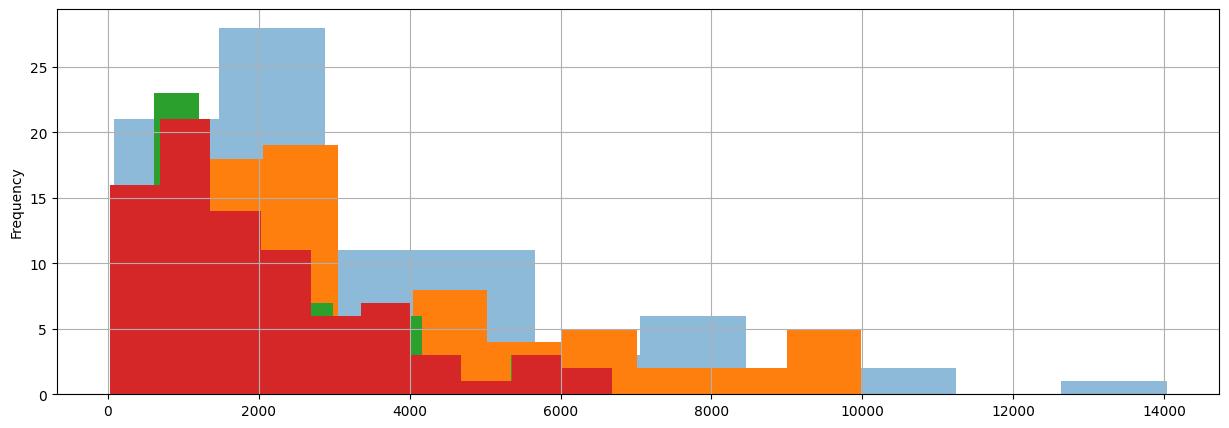

In [ ]:
df['social_contracts_2021'].plot.hist(column = ['social_contracts_2021'], bins=10, figsize= (15,5), alpha = 0.5)
df['social_contracts_2022'].hist(bins=10)
df['social_contracts_2023_aug'].hist(bins=10)
df['social_contracts_2023_sept'].hist(bins=10)

In [ ]:
df.describe()

,social_contracts_2021,social_contracts_2022,social_contracts_2023_aug,social_contracts_2023_sept
count,84.000000,84.000000,84.000000,84.000000
mean,3361.642857,3289.369048,1745.202381,2004.571429
std,2752.711214,2528.368119,1384.347950,1578.227451
min,87.000000,78.000000,29.000000,31.000000
25%,1552.250000,1439.250000,763.250000,887.500000
50%,2542.000000,2466.500000,1330.000000,1540.500000
75%,4895.250000,4468.750000,2471.250000,2812.750000
max,14028.000000,9986.000000,5939.000000,6683.000000


In [ ]:
from scipy import stats as st
import warnings

In [ ]:
import seaborn as sns

In [ ]:
number_21 = df ['social_contracts_2021']

In [ ]:
number_23_sept = df['social_contracts_2023_sept']

In [ ]:
number_21.describe()

count       84.000000
mean      3361.642857
std       2752.711214
min         87.000000
25%       1552.250000
50%       2542.000000
75%       4895.250000
max      14028.000000
Name: social_contracts_2021, dtype: float64

In [ ]:
number_23_sept.describe()

count      84.000000
mean     2004.571429
std      1578.227451
min        31.000000
25%       887.500000
50%      1540.500000
75%      2812.750000
max      6683.000000
Name: social_contracts_2023_sept, dtype: float64

Проводим статистическое исследование: принимаем нулевую гипотезу НО, что средний размер выданных соц контрактов не изменился, тогда альтернативная гипотеза заключается в том что выданных
Соц контрактов по регионам стало меньше  


In [ ]:
# устанавливаем уровень статистической значимости 5% если значение p-value меньше то отвергаем нулевую гипотезу и принимаем альтерантивную #
# p-value - вероятность получить для данной вероятностной модели распределения значений
# случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.
# alpha = 0.05

results = st.ttest_ind(number_21, number_23_sept)

In [ ]:
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:

      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00012936182415796587
Отвергаем нулевую гипотезу


Строим диаграмму для визуализации проведенного исследования


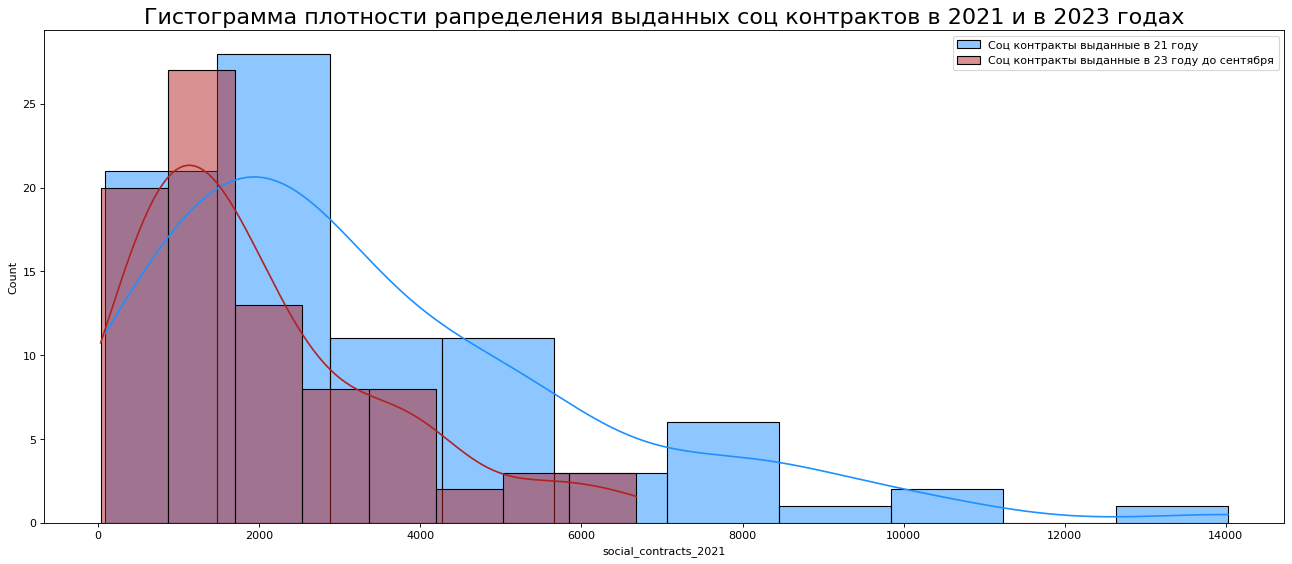

In [ ]:
### строим гистограмму для визуализации проведенного исследования:
plt.figure(figsize=(20,8), dpi= 80)
sns.histplot(number_21, color="dodgerblue", label="Соц контракты выданные в 21 году", kde=True )
sns.histplot(number_23_sept, color="firebrick", label="Соц контракты выданные в 23 году до сентября", kde=True)

plt.title('Гистограмма плотности рапределения выданных соц контрактов в 2021 и в 2023 годах', fontsize=20)
plt.legend()
plt.show()
warnings.filterwarnings("ignore")

Поскольку значение p-value - меньше уровня статистической значимости в 5%, мы отвергаем нулевую гипотезу и принимаем альтерантивную гипотезу, о том что средняя сумма выданных СК в 23 году меньше, чем в 2021 году. Полученная выше диаграмма наглядно это демонстрирует.

 Общее заключение по исследованию: эконометрически подтвержден факт, что количество нуждающихся в социальных контрактах постепенно снижается, а экономическое состояние регионов становится лучше.